### Module 4: Classification
Load creditcard_test.csv and use it as the test dataset to evaluate the classification models and compare their performance using 5-fold cross-validation.

In [34]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix

In [36]:
test = pd.read_csv("creditcard_test.csv")

X_test = test.drop(['Class'], axis = 1)
y_test = test.iloc[:,-1]

X_fraud = fraud_new.drop(['Class'], axis = 1)
y_fraud = fraud_new.iloc[:,-1]

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


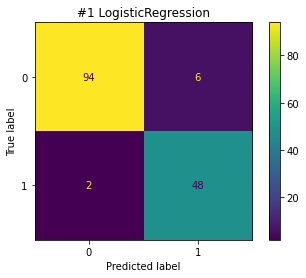

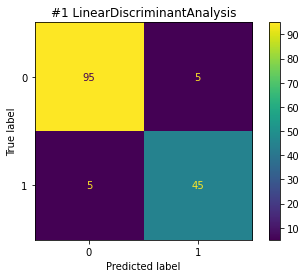

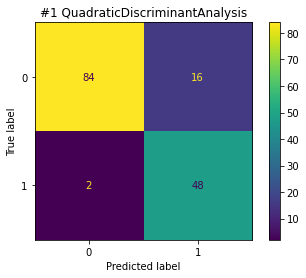

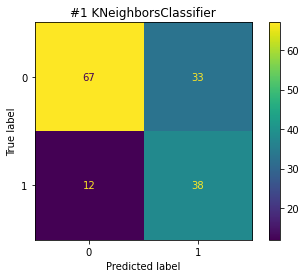

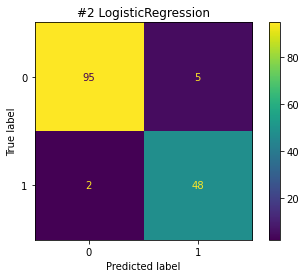

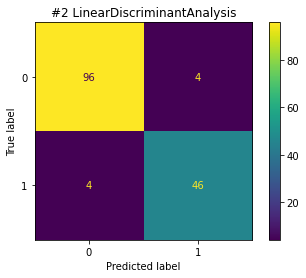

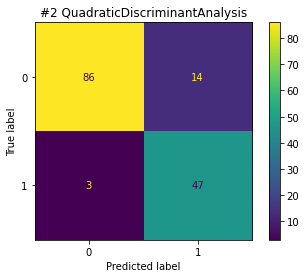

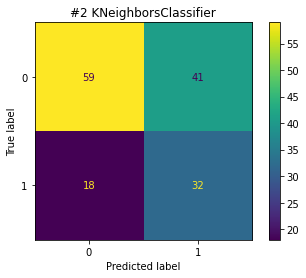

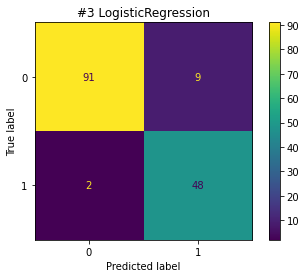

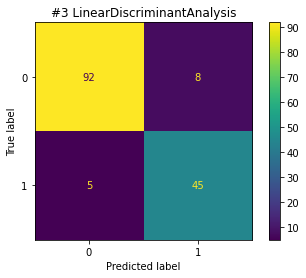

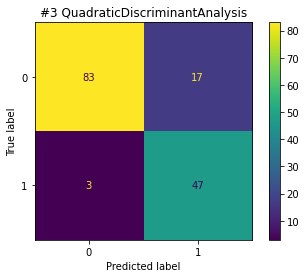

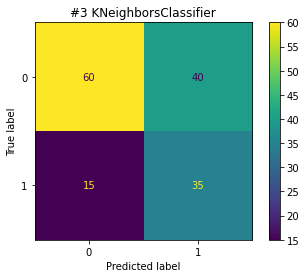

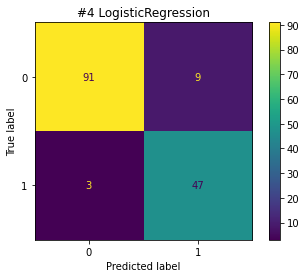

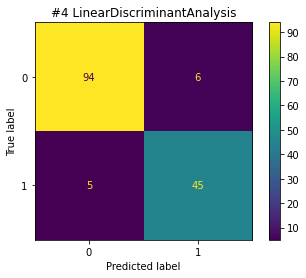

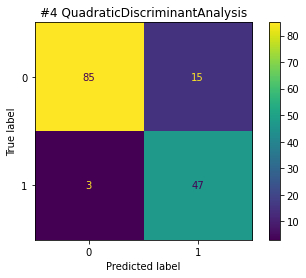

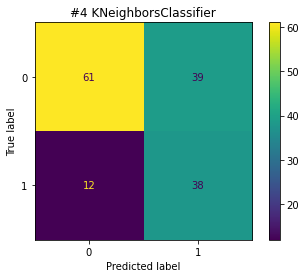

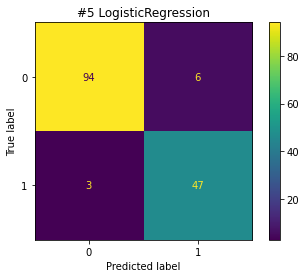

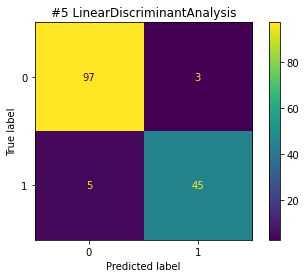

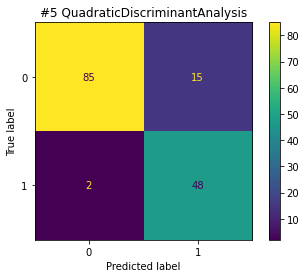

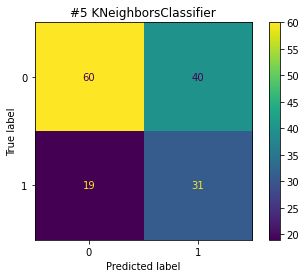

In [37]:
scores_lr = []
scores_lda = []
scores_qda = []
scores_kn = []

lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
kn = KNeighborsClassifier()

for x in range(5):
    temp = valid_new.sample(n = len(fraud_new))
    X_temp = pd.concat([temp.drop(['Class'], axis = 1), X_fraud])
    y_temp = pd.concat([temp.iloc[:,-1], y_fraud])
    
    lr.fit(X_temp, y_temp)
    scores_lr.append(lr.score(X_test, y_test))
    plot_confusion_matrix(lr, X_test, y_test)
    plt.title('#'+str(x+1)+' LogisticRegression')
    plt.show()
    
    lda.fit(X_temp, y_temp)
    scores_lda.append(lda.score(X_test, y_test))
    plot_confusion_matrix(lda, X_test, y_test)
    plt.title('#'+str(x+1)+' LinearDiscriminantAnalysis')
    plt.show()
    
    qda.fit(X_temp, y_temp)
    scores_qda.append(qda.score(X_test, y_test))
    plot_confusion_matrix(qda, X_test, y_test)
    plt.title('#'+str(x+1)+' QuadraticDiscriminantAnalysis')
    plt.show()
    
    kn.fit(X_temp, y_temp)
    scores_kn.append(kn.score(X_test, y_test))
    plot_confusion_matrix(kn, X_test, y_test)
    plt.title('#'+str(x+1)+' KNeighborsClassifier')
    plt.show()

In [38]:
print('LogisticRegression : %0.3f' % np.mean(scores_lr))    
print('LinearDiscriminantAnalysis : %0.3f' % np.mean(scores_lda))    
print('QuadraticDiscriminantAnalysis : %0.3f' % np.mean(scores_qda))    
print('KNeighborsClassifier : %0.3f' % np.mean(scores_kn))    

print('\nOverall : %0.3f' % ((np.mean(scores_kn) + np.mean(scores_lda) + np.mean(scores_qda) + np.mean(scores_kn)) /4)) 


LogisticRegression : 0.937
LinearDiscriminantAnalysis : 0.933
QuadraticDiscriminantAnalysis : 0.880
KNeighborsClassifier : 0.641

Overall : 0.774


Comparing the above 4 models and overall accuracies, 
LogisticRegression and LinearDiscriminantAnalysis are always having accuracy with > 90%. While QuadraticDiscriminantAnalysis always get > 80% and KNeighborsClassifier always > 60%, thereby obtaining a desirable accuracy( > 70%).